In [19]:
from spai.storage import Storage

# retrieve all images
storage = Storage("../../data")
images = storage.list("NDVI*")
print("Found the following images:", images)

Found the following images: ['NDVI_2023-04-12.tif', 'NDVI_2023-04-17.tif', 'NDVI_2023-05-17.tif', 'NDVI_2023-04-02.tif', 'NDVI_2023-03-03.tif', 'NDVI_2023-04-07.tif', 'NDVI_2023-05-02.tif']


In [20]:
import numpy as np

# categorize ndvis

def categorize(data, cats=[-100, 0.1, 0.3, 0.5, 100]):
    data0 = data.copy()
    for i, cat in enumerate(cats[:-1]):
        data0[(data > cat) & (data <= cats[i+1])] = i
    data0 = data0.astype(np.uint8)
    return data0
       
for image in images:
    ds = storage.read(image)
    data = ds.read(1)
    cats = categorize(data)
    date = image.split("_")[1].split(".")[0]
    storage.create(cats, f"cat_NDVI_{date}.tif", ds=ds)

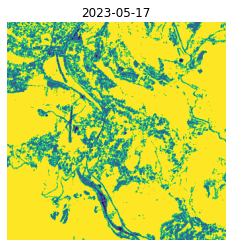

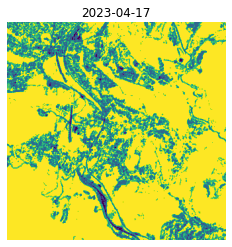

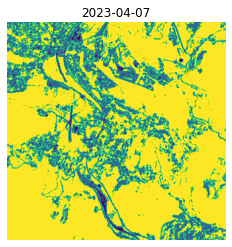

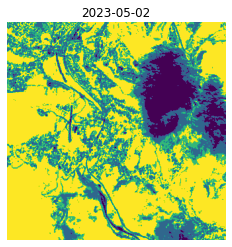

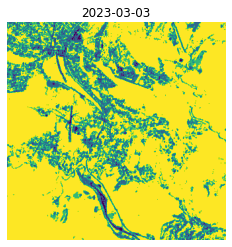

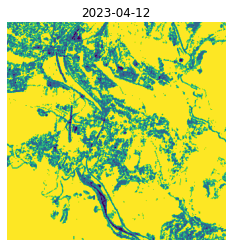

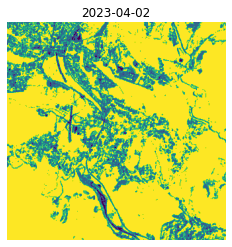

In [21]:
import matplotlib.pyplot as plt

# visualize categorized ndvis

images = storage.list("cat_NDVI*")
for image in images:
    ds = storage.read(image)
    cats = ds.read(1)
    date = image.split("_")[2].split(".")[0]
    plt.imshow(cats)
    plt.title(date)
    plt.axis("off")
    plt.show()


In [22]:
import pandas as pd

# compute statistics

stats = []
mppx = 10 * 10  # meters per pixel
hasppx = mppx / 10000  # hectares per square meter
for image in images:
    ds = storage.read(image)
    data = ds.read(1)
    counts = np.bincount(data.flatten())
    has = counts * hasppx
    stats.append(has)

dates = [image.split("_")[2].split(".")[0] for image in images]
df = pd.DataFrame(stats, columns=['bare ground', 'low', 'medium', 'high'], index=dates)
df.index = pd.to_datetime(df.index)
df = df.sort_index()
df

,bare ground,low,medium,high
2023-03-03,10.89,133.28,178.50,769.63
2023-04-02,9.41,144.30,192.94,745.65
2023-04-07,7.66,147.91,214.74,721.99
2023-04-12,10.19,146.85,202.53,732.73
2023-04-17,8.75,145.44,209.45,728.66
2023-05-02,90.98,209.59,228.37,563.36
2023-05-17,3.82,120.43,218.11,749.94


In [23]:
# save statistics

storage.create(df, "stats.csv")

'../../data/stats.csv'

In [24]:
df = storage.read("stats.csv")
df

,bare ground,low,medium,high
2023-03-03,10.89,133.28,178.50,769.63
2023-04-02,9.41,144.30,192.94,745.65
2023-04-07,7.66,147.91,214.74,721.99
2023-04-12,10.19,146.85,202.53,732.73
2023-04-17,8.75,145.44,209.45,728.66
2023-05-02,90.98,209.59,228.37,563.36
2023-05-17,3.82,120.43,218.11,749.94
